# Imbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://drive.google.com/uc?id=1oRNf2muX8VLH8ky5F_cTgGYbHlD-ZwVK&export=download. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data= pd.read_csv(r"C:\Users\Vithushan\Downloads\paysim.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
data.step.value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [4]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

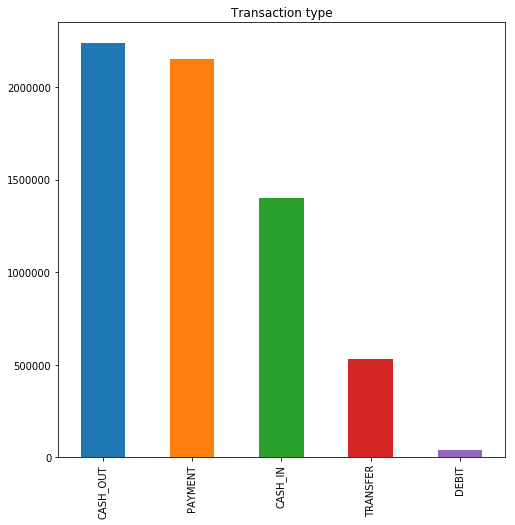

In [14]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

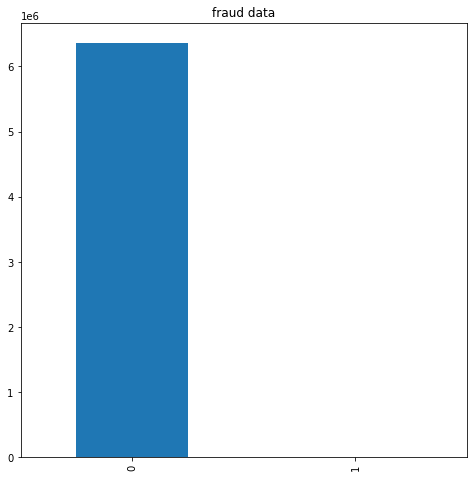

In [5]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.isFraud.value_counts().plot(kind='bar', title="fraud data", ax=ax, figsize=(8,8))
plt.show()

In [6]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

C:\Users\Vithushan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFraud', ylabel='Density'>

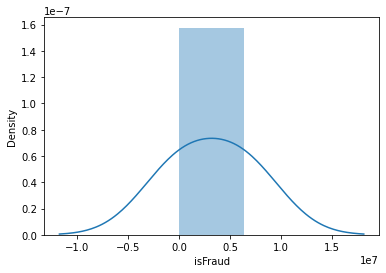

In [7]:
sns.distplot(data.isFraud.value_counts())


In [8]:
# the data is highly imbalanced

### What is the distribution of the outcome? 

In [9]:
# Your response here
#the distribution is right skewed

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [10]:
# Your code here
'''
If the step represents for example each hour I guess it can be accepted as a time variable. It starts at 1, so it might be understood like first hour, second etc. 
'''

'\nIf the step represents for example each hour I guess it can be accepted as a time variable. It starts at 1, so it might be understood like first hour, second etc. \n'

In [11]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [13]:
data.nameOrig.nunique()

6353307

In [14]:
data.nameDest.nunique()

2722362

In [15]:
(data.nameDest.nunique()/data.shape[0])*100

42.78680795018404

In [16]:
data.shape

(6362620, 11)

In [17]:
data.drop(columns=['nameOrig', 'nameDest'], inplace=True) 

In [18]:
from sklearn.preprocessing import LabelEncoder

lbl_ebcode = LabelEncoder()
data.type = lbl_ebcode.fit_transform(data.type)


In [19]:
data.dtypes

step                int64
type                int32
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [20]:
data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

### Run a logisitc regression classifier and evaluate its accuracy.

In [21]:
# Your code here
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# First I define x and y 
y=data['isFraud']
x= data.drop(columns='isFraud')

#Second I standarize data as I will be using the logistic regression
x = StandardScaler().fit_transform(x)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [23]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [24]:
y_pred = lr.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Precision score: ', precision_score(y_test,y_pred))
print('Confusion matrix: ', confusion_matrix(y_test,y_pred))
print('f1_score: ', f1_score(y_test,y_pred))
print('Recall score: ', recall_score(y_test,y_pred))
print('ROC_AUC: ', roc_auc_score(y_test,y_pred))

Accuracy score:  0.9992157318840352
Precision score:  0.909541511771995
Confusion matrix:  [[1270792      73]
 [    925     734]]
f1_score:  0.5952960259529603
Recall score:  0.4424352019288728
ROC_AUC:  0.7211888803686218


### Now pick a model of your choice and evaluate its accuracy.

In [ ]:
# Your code here
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(x_train, y_train)
y_pred2 = rf.predict(x_test)

In [ ]:
print('Accuracy score: ', accuracy_score(y_test,y_pred2))
print('Precision score: ', precision_score(y_test,y_pred2))
print('Confusion matrix: ', confusion_matrix(y_test,y_pred2))
print('f1_score: ', f1_score(y_test,y_pred2))
print('Recall score: ', recall_score(y_test,y_pred2))
print('ROC_AUC: ', roc_auc_score(y_test,y_pred2))

### Which model worked better and how do you know?

In [ ]:
# Your response here
'''
The second model worked much better. All the metrics are better for Random Forset Classifier when compared to Logistic regression. 
The accuracy score is high (close to 100%) for both models, but Prcision score is much higher for Random forest classifier. It si logic, when we look at the con fusion matrix. Random Forest Classifier calssifed correctly more elements in the second class. This explains higher values of f1_score, recall score and roc_auc.
'''

### Let's use NearMiss method for undersampling and compare the results with previous

### And now let's apply SMOTE

### Apply your model on improved data

### Calculate classification report for imbalanced data to evaluate the models

### What is your conclusion?